In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# do we need to include the error on x? 

In [3]:
#start with one point
#8.1600E-02  245e-6    1.6604E+01   0.17
#create array of means
x_train = np.array([8.1600E-02])
y_train = np.array([1.6604E+01])
#create array of errors
error_y_train = np.array([0.17]) #this means the true value of y is +- 0.17
#we are focusing on y because that is the predicted value 
#create array of testing values 


In [4]:
#define mean and standard deviaiton - should these be something else?
mu, sigma = y_train, error_y_train # mean and standard deviation
s = np.random.normal(mu, sigma, 100) # chooses point from Gaussian distribution 

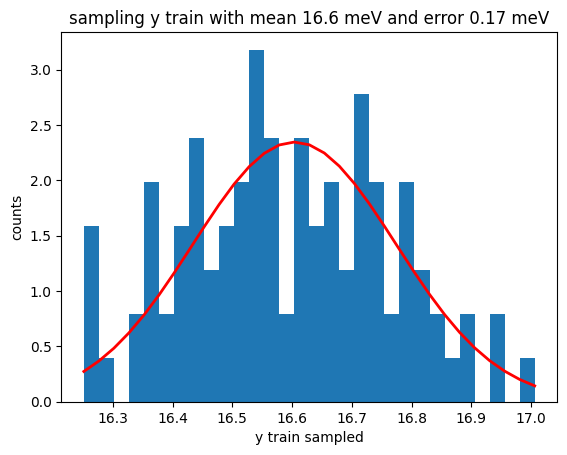

[16.61200582 16.44882732 16.54407283 16.6814111  16.33651783 16.63873669
 16.36926892 16.74315956 16.2899701  16.74443502 16.60041117 16.6196513
 16.74040326 16.79662468 16.67617244 16.81895488 16.7156864  16.57646705
 16.53363563 16.66590369 16.44337006 16.48897896 16.73356532 16.83127566
 16.51218439 16.27340095 16.535512   16.81135838 16.26715174 16.55808831
 16.70960197 16.78891165 16.40573599 16.67937283 16.56497971 16.51597551
 16.79089573 16.37467146 16.62728546 16.86657074 16.25376863 16.47203177
 16.80400736 16.70659526 16.43730596 16.72350475 16.61178364 16.79808383
 16.83374373 16.42510767 16.70520038 16.70640966 16.89401067 16.63040188
 16.35636463 16.54126607 16.39844823 16.48860101 16.6637239  16.82169563
 16.43613566 16.50253675 16.68863677 17.00598147 16.5047907  16.56099924
 16.62284158 16.71199775 16.37445531 16.75576305 16.40680856 16.95401678
 16.50351108 16.35699992 16.77706373 16.40014637 16.55223501 16.336765
 16.65084903 16.60896979 16.4528269  16.42949508 16.56

In [5]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlabel("y train sampled")
plt.ylabel("counts")
plt.title("sampling y train with mean 16.6 meV and error 0.17 meV")
plt.show()
print(s)

Now, we will define a GPR model to establish a PDF function 
Using a previously executed example, this uses conner data 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel parameters before fit:
1**2 * RBF(length_scale=1))
Kernel parameters after fit: 
252**2 * RBF(length_scale=0.1) 
Log-likelihood: -29.074


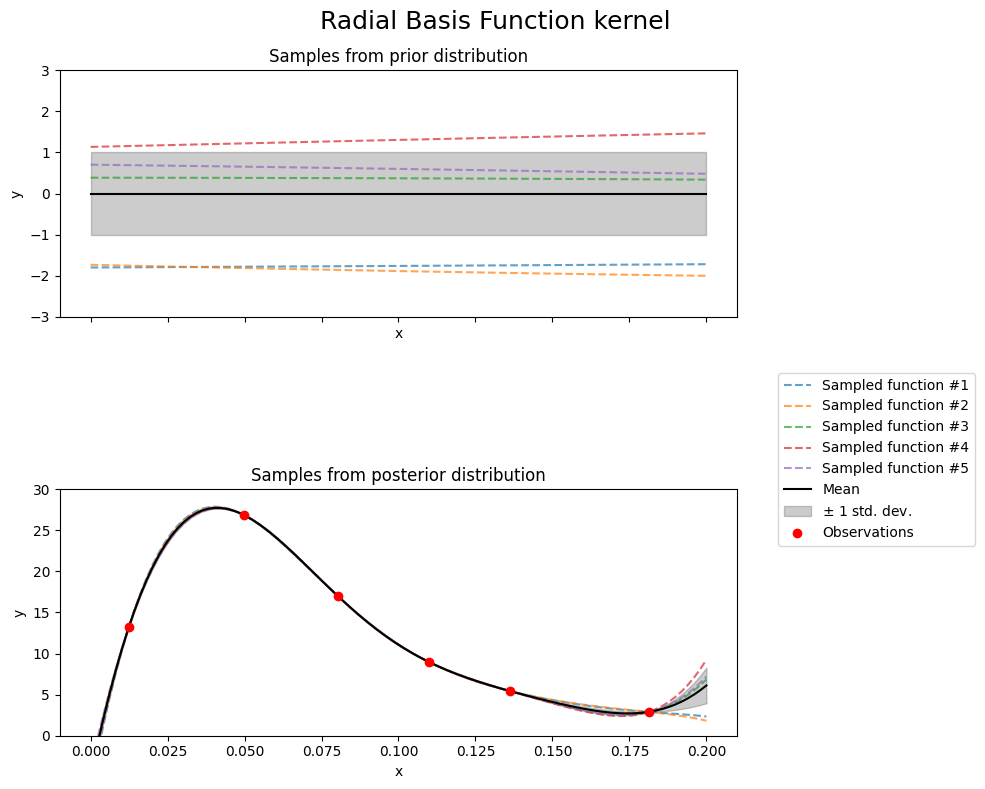

In [6]:
#function for sepearating data 

def separate_data(data):
    '''
    input: data as 4 collom array
    output: 4 separated vectors based on collum

    '''

    lines = data.strip().split('\n')
    COM = []
    COMerror = []
    sfactor = []
    sfactorerror = []

    for line in lines:
        parts = line.split()
        COM.append(float(parts[0]))
        COMerror.append(float(parts[1]))
        sfactor.append(float(parts[2]))
        sfactorerror.append(float(parts[3]))

    return COM, COMerror, sfactor, sfactorerror

#set up training data - [Conner]

conner_dat = """1.2420E-02  60e-6    1.3227E+01   0.13
4.9980E-02  161e-6    2.6833E+01   0.27
 8.0400E-02  242e-6    1.6970E+01   0.17
     1.0980E-01  320e-6    8.9950E+00   0.09
     1.3620E-01  392e-6    5.4398E+00   0.05
     1.8120E-01  512e-6    2.8963E+00   0.03
 


   
"""
# Call separate_data function and unpack the returned tuples
connerCOM, connerCOMerror, connersfactor, connersfactorerror = separate_data(conner_dat)

import matplotlib.pyplot as plt
import numpy as np

def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    
    #prediction data - make it the correct size and shape for the example 
    x = np.linspace(0, 0.2, 100)
    X = x.reshape(-1, 1)

    #calculate mean and std based off prediction data 
    y_mean, y_std = gpr_model.predict(X, return_std=True)
    
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.2,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return x, y_mean



X_train = np.array(connerCOM).reshape(-1,1)

y_train = np.array(connersfactor).reshape(-1,1)

n_samples = 5


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")
axs[0].set_ylim([-3,3])

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=100, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")
axs[1].set_ylim([0,30])

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

# and optimizing the kernel 
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)


Now, we need the mean function 

In [7]:
x, y_mean = plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0]) # couldnt think of a better way to go about this
print(x, y_mean)

[0.         0.0020202  0.0040404  0.00606061 0.00808081 0.01010101
 0.01212121 0.01414141 0.01616162 0.01818182 0.02020202 0.02222222
 0.02424242 0.02626263 0.02828283 0.03030303 0.03232323 0.03434343
 0.03636364 0.03838384 0.04040404 0.04242424 0.04444444 0.04646465
 0.04848485 0.05050505 0.05252525 0.05454545 0.05656566 0.05858586
 0.06060606 0.06262626 0.06464646 0.06666667 0.06868687 0.07070707
 0.07272727 0.07474747 0.07676768 0.07878788 0.08080808 0.08282828
 0.08484848 0.08686869 0.08888889 0.09090909 0.09292929 0.09494949
 0.0969697  0.0989899  0.1010101  0.1030303  0.10505051 0.10707071
 0.10909091 0.11111111 0.11313131 0.11515152 0.11717172 0.11919192
 0.12121212 0.12323232 0.12525253 0.12727273 0.12929293 0.13131313
 0.13333333 0.13535354 0.13737374 0.13939394 0.14141414 0.14343434
 0.14545455 0.14747475 0.14949495 0.15151515 0.15353535 0.15555556
 0.15757576 0.15959596 0.16161616 0.16363636 0.16565657 0.16767677
 0.16969697 0.17171717 0.17373737 0.17575758 0.17777778 0.1797

Now, interpolate the mean function from this data?

In [8]:
from scipy.interpolate import interp1d
import numpy as np

# Given data
x_data = np.array([0.0, 0.0020202, 0.0040404, 0.00606061, 0.00808081, 0.01010101, 0.01212121, 0.01414141, 0.01616162, 0.01818182, 0.02020202, 0.02222222, 0.02424242, 0.02626263, 0.02828283, 0.03030303, 0.03232323, 0.03434343, 0.03636364, 0.03838384, 0.04040404, 0.04242424, 0.04444444, 0.04646465, 0.04848485, 0.05050505, 0.05252525, 0.05454545, 0.05656566, 0.05858586, 0.06060606, 0.06262626, 0.06464646, 0.06666667, 0.06868687, 0.07070707, 0.07272727, 0.07474747, 0.07676768, 0.07878788, 0.08080808, 0.08282828, 0.08484848, 0.08686869, 0.08888889, 0.09090909, 0.09292929, 0.09494949, 0.0969697, 0.0989899, 0.1010101, 0.1030303, 0.10505051, 0.10707071, 0.10909091, 0.11111111, 0.11313131, 0.11515152, 0.11717172, 0.11919192, 0.12121212, 0.12323232, 0.12525253, 0.12727273, 0.12929293, 0.13131313, 0.13333333, 0.13535354, 0.13737374, 0.13939394, 0.14141414, 0.14343434, 0.14545455, 0.14747475, 0.14949495, 0.15151515, 0.15353535, 0.15555556, 0.15757576, 0.15959596, 0.16161616, 0.16363636, 0.16565657, 0.16767677, 0.16969697, 0.17171717, 0.17373737, 0.17575758, 0.17777778, 0.17979798, 0.18181818, 0.18383838, 0.18585859, 0.18787879, 0.18989899, 0.19191919, 0.19393939, 0.1959596, 0.1979798, 0.2])
y_data = np.array([-4.937618, -1.41388401, 1.88539809, 4.962147, 7.81892437, 10.45891052, 12.8858777, 15.10416108, 17.11862761, 18.934643, 20.55803693, 21.9950667, 23.25237953, 24.33697377, 25.25615918, 26.01751641, 26.62885616, 27.09817795, 27.43362893, 27.64346285, 27.73599944, 27.71958445, 27.60255044, 27.39317872, 27.09966242, 26.73007107, 26.29231674, 25.79412189, 25.24298929, 24.64617386, 24.01065675, 23.34312177, 22.64993416, 21.93712186, 21.21035937, 20.47495419, 19.73583587, 18.99754776, 18.2642414, 17.53967356, 16.82720584, 16.12980693, 15.45005723, 14.79015603, 14.15193091, 13.53684939, 12.94603271, 12.38027154, 11.84004351, 11.32553245, 10.83664908, 10.37305313, 9.93417652, 9.51924759, 9.12731612, 8.75727896, 8.40790604, 8.07786666, 7.76575584, 7.47012041, 7.1894849, 6.92237687, 6.66735153, 6.42301556, 6.18804987, 5.96123128, 5.74145281, 5.52774266, 5.31928149, 5.1154182, 4.91568391, 4.71980408, 4.52770877, 4.33954102, 4.15566309, 3.97666087, 3.80334614, 3.63675688, 3.47815555, 3.32902541, 3.1910649, 3.06618018, 2.95647581, 2.86424379, 2.79195084, 2.74222426, 2.71783632, 2.72168731, 2.75678747, 2.82623781, 2.93321007, 3.08092586, 3.2726352, 3.51159457, 3.80104468, 4.144188, 4.54416627, 5.00403821, 5.52675741, 6.11515068])

# Perform linear interpolation
f_linear = interp1d(x_data, y_data, kind='linear')


Let's plot this against the posterior function to see if it worked or not..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


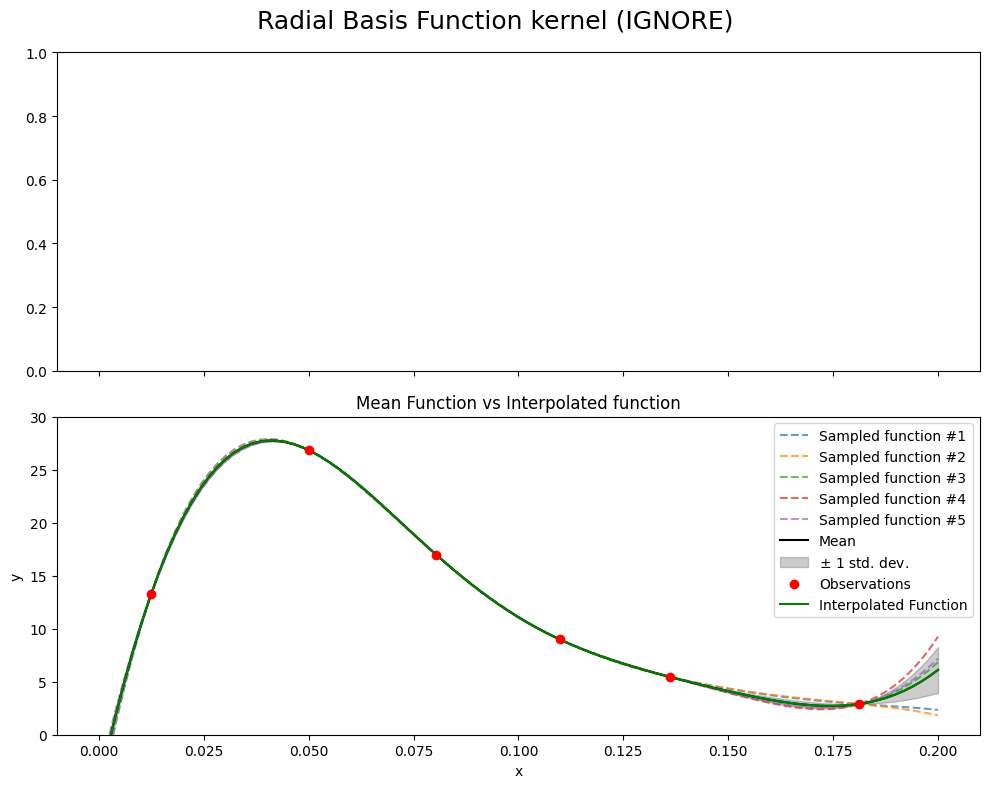

In [9]:
# Perform linear interpolation
f_linear = interp1d(x_data, y_data, kind='linear')

# Define the prediction data for interpolation
x_interpolated = np.linspace(min(x_data), max(x_data), 100)
y_interpolated = f_linear(x_interpolated)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(10, 8))


# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=100, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Mean Function vs Interpolated function")
axs[1].set_ylim([0, 30])  # Adjust y-axis limits as needed

# Plot interpolated function
axs[1].plot(x_interpolated, y_interpolated, color="green", label="Interpolated Function")
axs[1].legend()

fig.suptitle("Radial Basis Function kernel (IGNORE)", fontsize=18)
plt.tight_layout()


plt.show()


yay it worked. 
So now we will choose one point in s of x_test:
- s = 16.49267033
- x_test = 8.1600E-02
sigma(x_test) is the s.d. of the GPR trained on your training data at the testing point x_test,
- sigma(x_test) = [0.00373278]
mu(x_test) is its mean
- mu(x_test) = [16.5518785]

In [10]:
x_test = np.array(8.1600E-02).reshape(-1,1)
mu_x_test, sigma_x_test = gpr.predict(x_test, return_std = True)
print(sigma_x_test)
print(mu_x_test)

[0.00373278]
[16.5518785]


and now, 
pr(s|GPR) \propto exp[-1/2 (s-mu(x_test)) 1/sigma(x_test)^2 (s-mu(x_test))]

In [11]:
import math

prob_s_given_GPR = math.exp(((-0.5)*(16.49267033-16.5518785))*((1/0.00373278)**2)*(16.49267033-16.5518785))
print(prob_s_given_GPR)

2.3296064748574668e-55


not very likely I guess..

Now, to write a function that will do this for all points in S (generalization)

In [12]:
# mu_x_test and sigma_x_test remain the same 

In [13]:
import numpy as np

def calculate_prob_s_given_GPR(s, mu_x_test, sigma_x_test):
    # Ensure s, mu_x_test, and sigma_x_test are NumPy arrays
    s = np.array(s)
    mu_x_test = np.array(mu_x_test)
    sigma_x_test = np.array(sigma_x_test)
    
    # Calculate probability element-wise
    probability = np.exp(((-0.5)*(s - mu_x_test))*((1/ sigma_x_test)**2)*(s - mu_x_test))
    
    return probability

# Example array of s values
s_values = np.array(s)

# Example mu_x_test and sigma_x_test values
mu_x_test = 16.5518785
sigma_x_test = 0.00373278

# Calculate probabilities for each s value
probabilities = calculate_prob_s_given_GPR(s_values, mu_x_test, sigma_x_test)

# Print probabilities
print(probabilities)

avg_prob = np.mean(probabilities)

print(avg_prob)


[4.54858696e-057 3.16925643e-166 1.12322691e-001 3.26939908e-262
 0.00000000e+000 2.66721641e-118 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.95992416e-037 2.62154555e-072
 0.00000000e+000 0.00000000e+000 1.72651472e-241 0.00000000e+000
 0.00000000e+000 3.78210583e-010 6.50853609e-006 2.37612790e-203
 3.22295261e-184 2.20142041e-062 0.00000000e+000 0.00000000e+000
 2.78549134e-025 0.00000000e+000 6.69160146e-005 0.00000000e+000
 0.00000000e+000 2.50633260e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 4.77500814e-254 2.11383912e-003 8.15356642e-021
 0.00000000e+000 0.00000000e+000 2.42070852e-089 0.00000000e+000
 0.00000000e+000 4.38300822e-100 0.00000000e+000 0.00000000e+000
 2.66643259e-205 0.00000000e+000 1.18439724e-056 0.00000000e+000
 0.00000000e+000 3.51463127e-251 0.00000000e+000 0.00000000e+000
 0.00000000e+000 8.08976761e-097 0.00000000e+000 1.75723085e-002
 0.00000000e+000 3.97649894e-063 1.11911129e-195 0.00000000e+000
 1.68009607e-209 1.143238